### Molar Volume Using Redlich Kwong Equation of State

Calculate the molar volume and compressibility factor for gaseous n-butane at a pressure $P =16.6$ atm and a temperature $T  = 393.3$ K using the Redlich Kwong equation of state.

\begin{align}
V^3 P &- V^2 RT + V(a-Pb^2-RTb)-ab = 0   \\
a &= 0.42748 \frac{R^2 T_c^2}{P_c}\alpha  \\
\alpha &= \frac{1}{T_r^0.5}   \\
b &= 0.0664 \frac{R T_c}{P_c} \\
\end{align}

Where the reduced &temperature $T_c$ and compressibility $Z$ is given by:
\begin{align}
T_r &= \frac{T}{T_c} \\
Z &= \frac{PV}{RT} 
\end{align}

#### Solution method
To calculate the molar volume when, pressure ($P$), and temperature ($T$) are known the Redlich Kwong equation shall be solved using a nonlinear algebric equation solver. Here **fsolve** from *scipy.optimize* has been used.

In [5]:
from scipy.optimize import fsolve
from numpy import linspace
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
R=0.08206    #atm.L/gmol.K
# Operating conditions 
P=16.6   #atm
T=393.3  #K
    
def pvt(V):
    """
    Redlich Kwong equation of state
    """
  
    # for n-butane
    Tc=425.2    #K
    Pc=37.5     #atm
    
    alpha=(Tc/T)**0.5
    a=0.42748*( (R*Tc)**2 /Pc)*alpha
    b=0.08664*(R*Tc/Pc)
    # Redlich-Kwong equtaion
    f=P*V**3 - R*T*V**2 + (a-P*b**2 - R*T*b)*V - a*b
    return f
print(pvt(2))

25.980819086248843


#### Solution
Solve the nonlinear equation using **fsolve** method from scipy. **fsolve(func,x0)** find a root of the (non-linear) equations defined by func(x) = 0 given a starting estimate.

In [8]:
Vo=2 #initial guess
Vz=fsolve(pvt,Vo)
print('The molar volume of n-butane: ', Vz, 'liters')

# Calculate the compressibility factor
Z=P*Vz/(R*T)
print('The compressibility factor: ', Z)

The molar volume of n-butane:  [1.5064126] liters
The compressibility factor:  [0.77481241]


#### Visualization

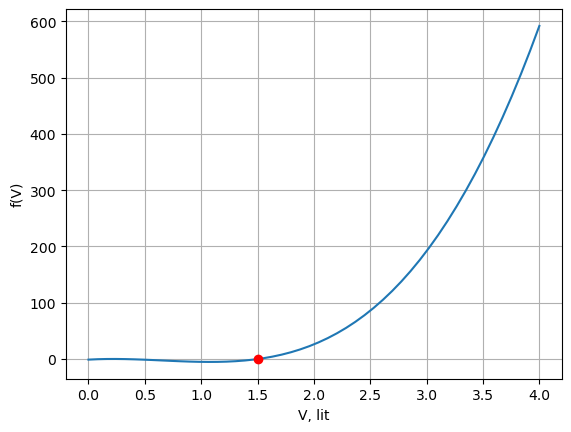

In [10]:
v=linspace(Vo-2, Vo+2) # A range of volume to plot Redlich Kwong equation against v at certain T and P
f=pvt(v)
plt.plot(v,f,Vz,pvt(Vz),'ro')
plt.xlabel('V, lit')
plt.ylabel('f(V)')
plt.grid('on')